Import of libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In total, the dataset contains 159 objects. We have reserved a part of the dataset for the baseline task. In this assignment, it is assumed to work with a dataset containing 119 objects.

# 0. Application of polynomial regression to predict a continuous parameter

The provided dataset consists of seven different types of fish sold in some fish shop. The goal is to predict the mass of the fish from some indirect features known about the fish. The features themselves may need to be synthesized from those that are known.

Use <code>train_test_split()</code> to split the dataset into training and test samples with the parameters specified in your assignment. Use stratification by column <code>Species</code>. Stratification will maintain the proportions of represented objects (by fish type representatives) in the training and test samples.

In [2]:
random_state = 23

df = pd.read_csv('fish_train.csv')

X,y = df.drop('Weight', axis =1), df.Weight

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state, stratify = df['Species'])

Find sample mean for the column <code>Width</code> of the obtained training sample.

In [3]:
print(X_train.Width.mean())
print(X_train)

4.448602105263158
    Species  Length1  Length2  Length3   Height   Width
84    Smelt     11.4     12.0     13.2   2.2044  1.1484
32    Roach     24.0     26.0     29.2   8.8768  4.4968
82     Pike     56.0     60.0     64.0   9.6000  6.1440
3     Bream     36.2     39.5     45.3  18.7542  6.7497
24    Bream     28.7     31.0     36.2  14.3714  4.8146
..      ...      ...      ...      ...      ...     ...
60     Pike     40.1     43.0     45.8   7.7860  5.1296
112   Perch     34.6     37.0     39.3  10.5717  6.3666
42    Perch     20.7     22.7     24.2   5.9532  3.6300
63    Perch     19.0     21.0     22.5   5.6925  3.6675
2     Bream     26.5     29.0     34.0  12.4440  5.1340

[95 rows x 6 columns]


# 1. Building a base model

Remove categorical features and train a linear regression model (<code>LinearRegression()</code>) on the training dataset. Perform predictions on the test dataset. 
Evaluate the model using the metric <code>r2_score()</code>.

In [4]:
model_basic = LinearRegression().fit(X_train.drop(['Species'], axis=1), y_train)

# Predict using the trained model on the testing data
y_pred = model_basic.predict(X_test.drop(['Species'], axis=1))

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

R-squared score: 0.8885408749541964


# 2. Adding feature preprocessing

## Use of PCA

Using, for example, <code>sns.heatmap()</code>, construct a feature correlation matrix of the training dataset and identify the top three most correlated features.

<Axes: >

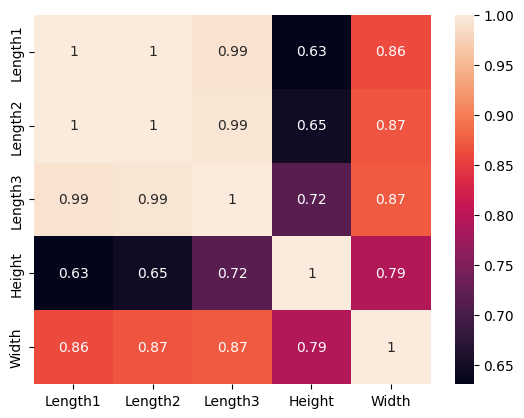

In [86]:
import seaborn as sns

X_train_droped = X_train.drop(['Species'], axis =1)
sns.heatmap(X_train_droped.corr(), annot = True)


Linear models respond rather poorly to correlated features, so it makes sense to get rid of such features before training begins.

Use the principal component analysis to reduce the number of uninformative dimensions.

1) Apply the principal component analysis (<code>PCA(n_components=3, svd_solver='full')</code>) to the three most correlated features found. 

2) Calculate the explained variance ratio when using only the first principal component.

3) Replace the top three most correlated features with the new feature <code>Lengths</code> whose values coincide with the scores for the first principal component.

In [9]:
lengths = X_train[['Length1', 'Length2', 'Length3']]
pca = PCA(n_components = 3, svd_solver = 'full').fit(lengths)

X_train['Lengths']= pca.transform(lengths)[:,0]
print(pca.explained_variance_ratio_[0])

0.9960410310578471


In [10]:
X_train

,Species,Length1,Length2,Length3,Height,Width,Lengths
84,Smelt,11.4,12.0,13.2,10.712016,1.514536,-28.388897
32,Roach,24.0,26.0,29.2,699.470343,90.930738,-3.693502
82,Pike,56.0,60.0,64.0,884.736000,231.928234,54.516232
3,Bream,36.2,39.5,45.3,6596.227555,307.505871,20.562715
24,Bream,28.7,31.0,36.2,2968.227824,111.604225,6.029988
...,...,...,...,...,...,...,...
60,Pike,40.1,43.0,45.8,472.001304,134.974119,24.969165
112,Perch,34.6,37.0,39.3,1181.502082,258.061189,14.553212
42,Perch,20.7,22.7,24.2,210.984922,47.832147,-10.452423
63,Perch,19.0,21.0,22.5,184.462936,49.329915,-13.391637


In [13]:


lengths_test = X_test[['Length1', 'Length2', 'Length3']]
pca = PCA(n_components = 3, svd_solver = 'full').fit(lengths_test)
X_test['Lengths']= pca.transform(lengths_test)[:,0]

X_test.head()

,Species,Length1,Length2,Length3,Height,Width,Lengths
31,Whitefish,33.7,36.4,39.6,11.7612,6.5736,10.041396
62,Pike,40.0,42.5,45.5,7.2800,4.3225,20.574557
43,Roach,21.1,22.5,25.0,6.4000,3.8000,-13.729785
26,Bream,29.1,31.5,36.4,13.7592,4.3680,2.775425
80,Parkki,24.0,26.0,29.0,11.3680,4.2340,-7.691221


Apply the obtained transformation for the same features in the test dataset. Note that it is not necessary to re-train the `PCA` transformation. Similarly to the previous step, replace the three considered features by one.

In [4]:
from sklearn.decomposition import PCA
lengths_test  = X_test[['Length1', 'Length2', 'Length3']]

# X_test = X_test.drop(['Length1', 'Length2', 'Length3'], axis =1)
X_test['Lengths']= pca.transform(lengths_test)[:,0]

NameError: name 'pca' is not defined

Train a basic linear regression model on the obtained training dataset, again discarding categorical features. Perform predictions on the test dataset and evaluate the model using <code>r2_score()</code>.

In [15]:
model_basic = LinearRegression().fit(X_train.drop(['Species', 'Length1', 'Length2', 'Length3'], axis =1), y_train)
r2_score(y_test, model_basic.predict(X_test.drop(['Species', 'Length1', 'Length2', 'Length3'], axis =1)))

0.16208406573299583

It can be seen that the quality of the model has not changed significantly.

## Feature engineering

Plot the dependencies of the features on the target feature, e.g., by using <code>sns.pairplot()</code>.

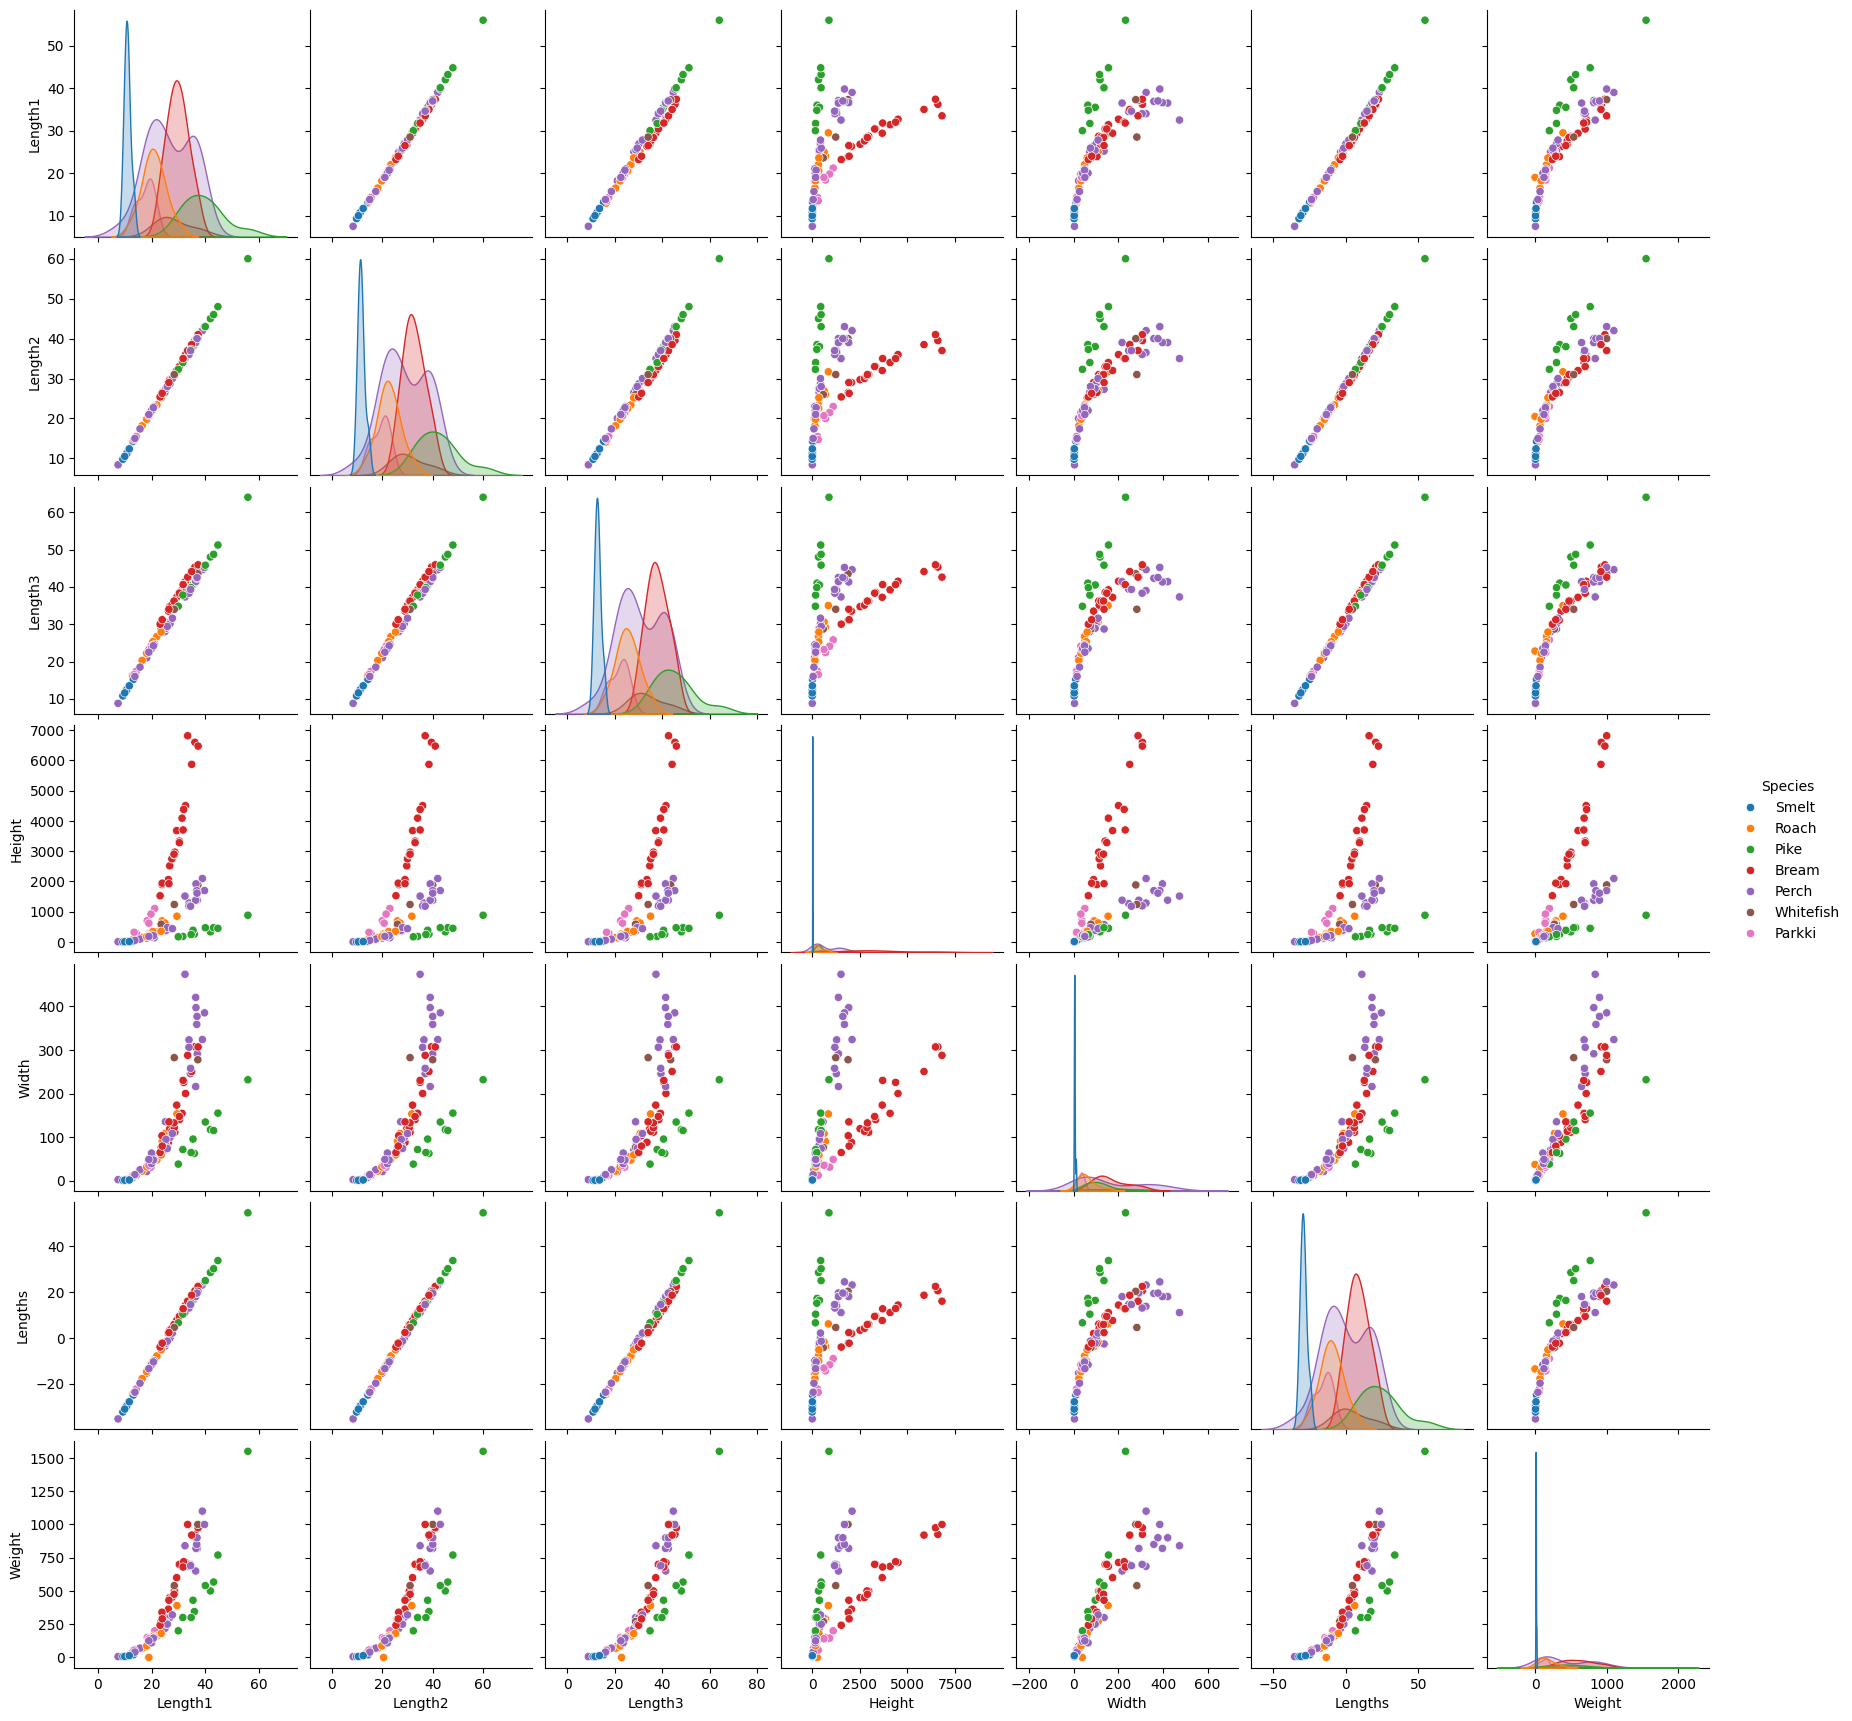

In [16]:
sns.pairplot(pd.concat((X_train, y_train), axis =1), hue = 'Species')

In [ ]:
X_train_not_cube = X_train.copy()
X_test_not_cube = X_test.copy()

X_train.drop(['Length1', 'Length2', 'Length3'], axis =1)
X_test.drop(['Length1', 'Length2', 'Length3'], axis =1)

X_train[['Height', 'Width', 'Lengths']] = X_train[['Height', 'Width', 'Lengths']]**3
X_test[['Height', 'Width', 'Lengths']] = X_test[['Height', 'Width', 'Lengths']]**3

sns.pairplot(pd.concat([X_train, y_train], axis = 1))

In [ ]:
X_train.Width.mean()

In [43]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

model_cubed = LinearRegression()
model_cubed.fit(X_train_cubed, y_train)

y_pred_cubed = model_cubed.predict(X_train_cubed)

# Calculate R-squared score
r2_cubed = r2_score(y_train, y_pred_cubed)

# Print the R-squared score
print("R-squared score of the model after cube transformation:", round(r2_cubed, 3))

R-squared score of the model after cube transformation: 0.976


It can be seen that the mass, in general, does not depend linearly on the other features. So, in order for the linear model to do a proper predictions, it makes sense to transform the features so that the dependence becomes more similar to a linear one. But how to come up with such a dependence?

It is logical to assume that the mass of a fish should somehow smoothly depend on the other parameters responsible in one way or another for its size. If we remember that mass is the product of density by volume, then

$$
m = \rho \cdot V.
$$

Suppose that the average density of all fish is the same, and recall that in homothety the volume of the object depends on the linear dimensions as a cube, then we obtain

$$
m\sim V\sim d^3
$$

Take to the third degree all the features of training and test datasets that are responsible in one way or another for the fish size (<code>Height, Width, Lengths</code>), and check whether the dependence of mass on these features has become linear.

In [ ]:
# < ENTER YOUR CODE HERE > 

Enter the sample mean for the column <code>Width</code> of the training dataset after cubeization.

In [ ]:
# < ENTER YOUR CODE HERE > 

Choose the images corresponding to the dependence of <code>Weight</code> on <code>Width</code> before the transformation and after.

Train a basic linear regression model on the obtained training dataset, again discarding categorical features. Perform predictions for the test dataset, evaluate the model using `r2_score()`.

In [ ]:
# < ENTER YOUR CODE HERE > 

Note how such uncomplicated feature work helped dramatically improve the quality of the model!

## Adding categorical features

Add the previously excluded categorical features to the dataset obtained in the previous step, having previously performed one-hot encoding using pd.get_dummies(). Train the linear regression model. Enter r2_score() of the obtained model.

Perform the <code>one-hot</code> encoding of the categorial feature `Species`, e.g., using <code>pd.get_dummies()</code>.

Train a linear regression model on the obtained training dataset. Perform predictions for the test dataset, evaluate the model using the <code>r2_score()</code>.

<b>Note</b>: We purposely used stratified splitting so that all values of a categorical feature <code>Species</code> are present in all datasets. But this is not always possible. You can read about how to deal with this problem, for example, [here](https://predictivehacks.com/?all-tips=how-to-deal-with-get_dummies-in-train-and-test-dataset).

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the original data
data = pd.read_csv('fish_train.csv')
data.head()

# Extract the target variable 'Species'
y = data['Species']

# Extract the features
X = data[['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# Feature engineering - Cube the values of Width, Height, Lengths
X_train_cubed = X_train.copy()
X_train_cubed['Width'] = X_train_cubed['Width']**3
X_train_cubed['Height'] = X_train_cubed['Height']**3
X_train_cubed['Lengths'] = X_train_cubed['Length3']**3  # Assuming 'Length3' is the new feature from PCA

# Combine the one-hot encoded categorical features with the feature-engineered dataset
X_train_encoded = pd.concat([X_train_cubed, pd.get_dummies(y_train, prefix='Species')], axis=1)

# Train a linear regression model
model_encoded = LinearRegression()
model_encoded.fit(X_train_encoded, X_train_encoded)

# Feature engineering for the test set
X_test_cubed = X_test.copy()
X_test_cubed['Width'] = X_test_cubed['Width']**3
X_test_cubed['Height'] = X_test_cubed['Height']**3
X_test_cubed['Lengths'] = X_test_cubed['Length3']**3 

# Combine the one-hot encoded categorical features with the feature-engineered dataset
X_test_encoded = pd.concat([X_test_cubed, pd.get_dummies(y_test, prefix='Species')], axis=1)

# Make predictions on the test set
y_pred_encoded = model_encoded.predict(X_test_encoded)

# Calculate R-squared score
r2_encoded = r2_score(X_test_encoded, y_pred_encoded)

# Print the R-squared score
print("R-squared score of the model with one-hot encoded categorical feature:", round(r2_encoded, 3))


R-squared score of the model with one-hot encoded categorical feature: 1.0


Once again, the quality has increased.

It can be seen that after `one-hot` encoding the features became correlated. You can get rid of this, for example, by using the `drop_first=True` parameter. Re-train the model after correcting this flaw. Perform predictions for the test dataset, evaluate the model using <code>r2_score()</code>.

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the original data
data = pd.read_csv('fish_train.csv')
data.head()

# Extract the target variable 'Species'
y = data['Species']

# Print unique values of 'Species'
print("Unique values of 'Species':", y.unique())

# Extract the features
X = data[['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# Feature engineering - Cube the values of Width, Height, Lengths
X_train_cubed = X_train.copy()
X_train_cubed['Width'] = X_train_cubed['Width']**3
X_train_cubed['Height'] = X_train_cubed['Height']**3
X_train_cubed['Lengths'] = X_train_cubed['Length3']**3  # Assuming 'Length3' is the new feature from PCA

# Combine the one-hot encoded categorical features with the feature-engineered dataset
X_train_encoded = pd.concat([X_train_cubed, pd.get_dummies(y_train, prefix='Species', drop_first=True)], axis=1)

# Print data types of features
print("Data types of features in X_train_encoded:", X_train_encoded.dtypes)

# Print intermediate results for debugging
print("X_train_encoded shape:", X_train_encoded.shape)
print("X_test_encoded shape:", X_test_encoded.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Train a linear regression model
model_encoded = LinearRegression()
model_encoded.fit(X_train_encoded, X_train_encoded)

# Feature engineering for the test set
X_test_cubed = X_test.copy()
X_test_cubed['Width'] = X_test_cubed['Width']**3
X_test_cubed['Height'] = X_test_cubed['Height']**3
X_test_cubed['Lengths'] = X_test_cubed['Length3']**3 

# Combine the one-hot encoded categorical features with the feature-engineered dataset
X_test_encoded = pd.concat([X_test_cubed, pd.get_dummies(y_test, prefix='Species', drop_first=True)], axis=1)

# Print data types of features
print("Data types of features in X_test_encoded:", X_test_encoded.dtypes)

# Make predictions on the test set
y_pred_encoded = model_encoded.predict(X_test_encoded)

r2_encoded = r2_score(X_test_encoded, y_pred_encoded)

# Print the R-squared score
print("R-squared score of the model with corrected one-hot encoding:", round(r2_encoded, 3))


Unique values of 'Species': ['Roach' 'Perch' 'Bream' 'Whitefish' 'Smelt' 'Parkki' 'Pike']
Data types of features in X_train_encoded: Weight               float64
Length1              float64
Length2              float64
Length3              float64
Height               float64
Width                float64
Lengths              float64
Species_Parkki          bool
Species_Perch           bool
Species_Pike            bool
Species_Roach           bool
Species_Smelt           bool
Species_Whitefish       bool
dtype: object
X_train_encoded shape: (95, 13)
X_test_encoded shape: (24, 13)
y_train shape: (95,)
y_test shape: (24,)
Data types of features in X_test_encoded: Weight               float64
Length1              float64
Length2              float64
Length3              float64
Height               float64
Width                float64
Lengths              float64
Species_Parkki          bool
Species_Perch           bool
Species_Pike            bool
Species_Roach           bool
Species_Sme

On such a relatively small dataset, though, we see no difference.